In [1]:
import numpy as np
from keras.datasets import cifar10

C:\Users\gp\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential

In [3]:

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
print("There are {} train images and {} test images.".format(x_train.shape[0], x_test.shape[0]))
print('There are {} unique classes to predict.'.format(np.unique(y_train).shape[0]))

There are 50000 train images and 10000 test images.
There are 10 unique classes to predict.


In [6]:
num_classes = 10
from keras.utils import np_utils

x_train.shape[1:]
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
import matplotlib.pyplot as plt

Shape of each image in the training data:  (32, 32, 3)


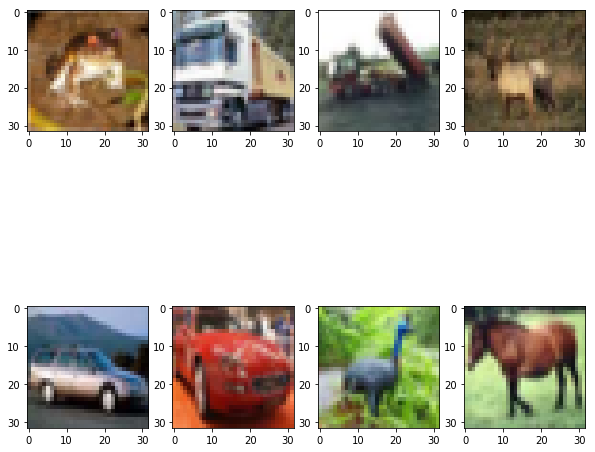

In [8]:
fig = plt.figure(figsize=(10, 10))

for i in range(1, 9):
    img = x_train[i-1]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)

print("Shape of each image in the training data: ", x_train.shape[1:])

In [9]:
# Convert and pre-processing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255
y_train.shape

(50000, 10)

In [10]:
def base_model():

    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
   
    model.add(Conv2D(32,(3, 3)))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
 
    model.add(Conv2D(64, (3,3),activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512,activation='relu')) 
  
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='sigmoid'))
   

   

# Train model

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
cnn_n = base_model()
cnn_n.summary()

# Fit model

cnn = cnn_n.fit(x_train, y_train, batch_size = 64 , epochs=20, validation_split=0.2,shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

C:\Users\gp\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.117146). Check your callbacks.
  % delta_t_median)


16128/40000 [===========>..................] - ETA: 14:00 - loss: 1.8551 - acc: 0.31

KeyboardInterrupt: 

In [61]:
Y_pred = cnn_n.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
y_pred.shape
y_pred

array([3, 8, 8, ..., 5, 1, 7])

Shape of each image in the training data:  (32, 32, 3)


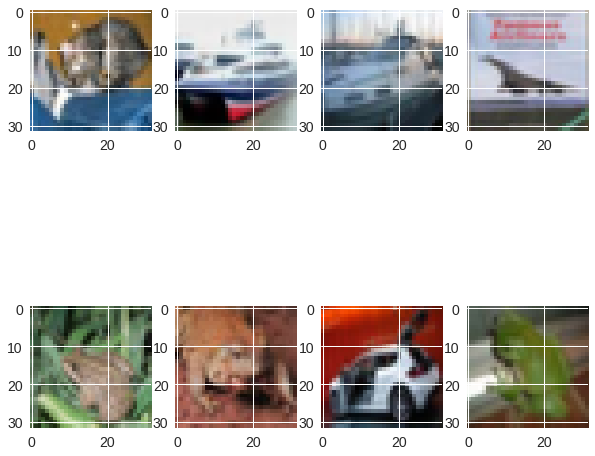

In [65]:
fig = plt.figure(figsize=(10, 10))

for i in range(1, 9):
    img = x_test[i-1]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)

print("Shape of each image in the training data: ", x_test.shape[1:])

In [64]:
list5=[]
for i in y_pred:
   if i==0:
      list5.append("airplane")
   if i==1:
      list5.append("automobile")
   if i==2:
      list5.append("bird")
   if i==3:
      list5.append("cat")
   if i==4:
      list5.append("deer")
   if i==5:
      list5.append("dog")
   if i==6:
      list5.append("frog")
   if i==7:
      list5.append("horse")
   if i==8:
      list5.append("ship")
   if i==9:
      list5.append("truck")
list5  

['cat',
 'ship',
 'ship',
 'airplane',
 'frog',
 'frog',
 'automobile',
 'frog',
 'cat',
 'automobile',
 'airplane',
 'truck',
 'horse',
 'horse',
 'truck',
 'frog',
 'dog',
 'horse',
 'ship',
 'frog',
 'horse',
 'airplane',
 'deer',
 'truck',
 'deer',
 'frog',
 'deer',
 'airplane',
 'truck',
 'frog',
 'frog',
 'dog',
 'deer',
 'cat',
 'truck',
 'cat',
 'deer',
 'automobile',
 'truck',
 'dog',
 'deer',
 'frog',
 'cat',
 'frog',
 'airplane',
 'truck',
 'cat',
 'truck',
 'horse',
 'bird',
 'truck',
 'ship',
 'horse',
 'cat',
 'ship',
 'ship',
 'horse',
 'cat',
 'cat',
 'cat',
 'horse',
 'frog',
 'frog',
 'cat',
 'frog',
 'bird',
 'automobile',
 'bird',
 'dog',
 'horse',
 'bird',
 'frog',
 'ship',
 'ship',
 'airplane',
 'bird',
 'airplane',
 'cat',
 'cat',
 'ship',
 'ship',
 'automobile',
 'automobile',
 'horse',
 'bird',
 'horse',
 'bird',
 'deer',
 'ship',
 'truck',
 'airplane',
 'frog',
 'ship',
 'frog',
 'deer',
 'frog',
 'frog',
 'airplane',
 'airplane',
 'deer',
 'deer',
 'dog',
 'f

In [0]:
'airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[813  14  44  14  20   1  12  10  49  23]
 [ 17 862   7   8   4   3  14  10  19  56]
 [ 66   0 638  64  82  39  76  26   9   0]
 [ 16   1  49 660  56  82  90  31   9   6]
 [ 10   1  44  51 782  14  56  35   6   1]
 [  8   0  38 238  45 580  35  51   4   1]
 [  3   0  31  56  14   6 878   5   5   2]
 [ 10   0  24  42  64  28  11 815   2   4]
 [ 55  11   8  16   6   3   8   8 870  15]
 [ 34  61   7  20   0   2  10  13  20 833]]


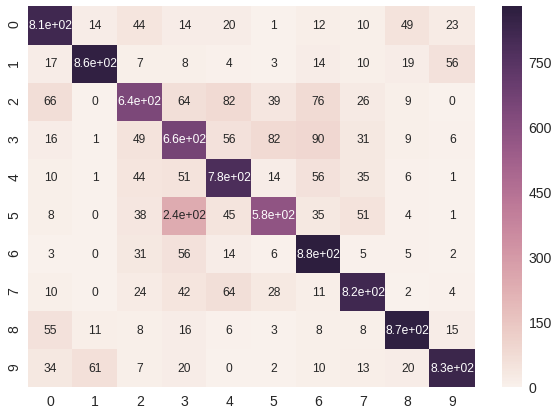

In [53]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn_n.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

In [24]:
from keras.applications.resnet50 import ResNet50, preprocess_input

#Loading the ResNet50 model with pre-trained ImageNet weights
model = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
from scipy.misc import imresize
import numpy as np